In [21]:
#Importing Necessary Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import feather
import os
import sys
import gc
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
#pd.read_csv('')

In [39]:
# This is a Parquet file, That's why I used dask dataframe
df = dd.read_parquet("CL_ohlcv_60min/CL_ohlcv_60min").compute()
#pd.read_csv("CL_ohlcv_60min.zip",compression='zip')

In [11]:
df.head()

,60minOpen,60minHigh,60minLow,60minClose,Range,Volume
Datetime,,,,,,
2015-01-01 22:00:00,53.68,53.76,53.68,53.76,0.08,0.0
2015-01-01 23:00:00,53.76,55.10,53.61,54.55,1.49,4860.0
2015-01-02 00:00:00,54.56,54.72,54.17,54.25,0.55,2854.0
2015-01-02 01:00:00,54.25,54.45,54.05,54.06,0.40,3299.0
2015-01-02 02:00:00,54.06,54.13,53.71,53.88,0.42,2998.0


In [12]:
df.shape

(30696, 6)

In [13]:
df.describe()

,60minOpen,60minHigh,60minLow,60minClose,Range,Volume
count,21126.000000,21126.000000,21126.000000,21126.000000,21126.000000,30696.000000
mean,50.402633,50.541552,50.266130,50.404569,0.275422,12016.698658
std,8.843203,8.834961,8.851148,8.844370,0.228639,21240.370420
min,26.340000,26.690000,26.220000,26.340000,0.000000,0.000000
25%,45.360000,45.510000,45.210000,45.360000,0.120000,0.000000
50%,49.240000,49.370000,49.130000,49.245000,0.210000,2522.500000
75%,54.917500,55.060000,54.787500,54.920000,0.350000,14132.250000
max,74.860000,75.260000,74.740000,74.860000,3.650000,326429.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30696 entries, 2015-01-01 22:00:00 to 2015-05-27 17:00:00
Data columns (total 6 columns):
60minOpen     21126 non-null float64
60minHigh     21126 non-null float64
60minLow      21126 non-null float64
60minClose    21126 non-null float64
Range         21126 non-null float64
Volume        30696 non-null float64
dtypes: float64(6)
memory usage: 2.9 MB


In [42]:
def plt_time_series(data,feature):
    fig,ax = plt.subplots(1,figsize = (16,5))
    ax.plot(data['Datetime'], data[feature])
    #ax.plot(data.index, data[feature])
    ax.set_ylabel(feature)
    ax.set_title('Time Series Plot of %s'%feature)
    #plt.show()

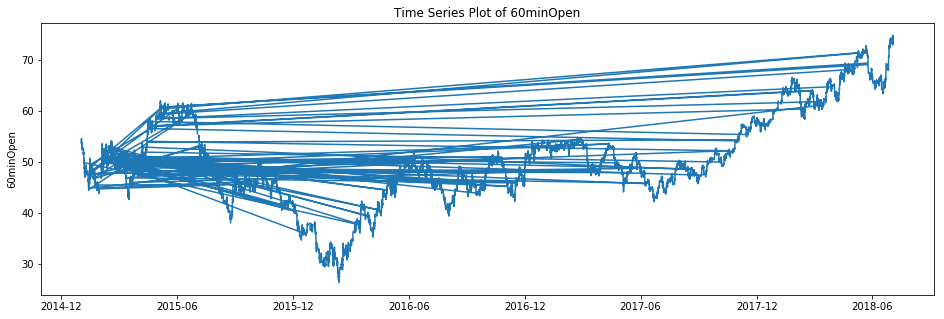

In [41]:
plt_time_series(df,'60minOpen')

In [24]:
# From this plot we can get idad that that this Df is not sorted

In [43]:
df.reset_index(inplace=True)

In [44]:
df.head()

,Datetime,60minOpen,60minHigh,60minLow,60minClose,Range,Volume
0,2015-01-01 22:00:00,53.68,53.76,53.68,53.76,0.08,0.0
1,2015-01-01 23:00:00,53.76,55.10,53.61,54.55,1.49,4860.0
2,2015-01-02 00:00:00,54.56,54.72,54.17,54.25,0.55,2854.0
3,2015-01-02 01:00:00,54.25,54.45,54.05,54.06,0.40,3299.0
4,2015-01-02 02:00:00,54.06,54.13,53.71,53.88,0.42,2998.0


In [45]:
df.sort_values(by = 'Datetime',inplace = True)

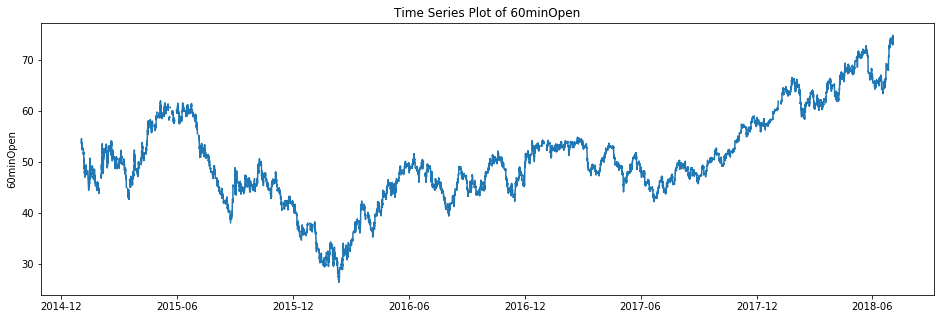

In [46]:
plt_time_series(df,'60minOpen')

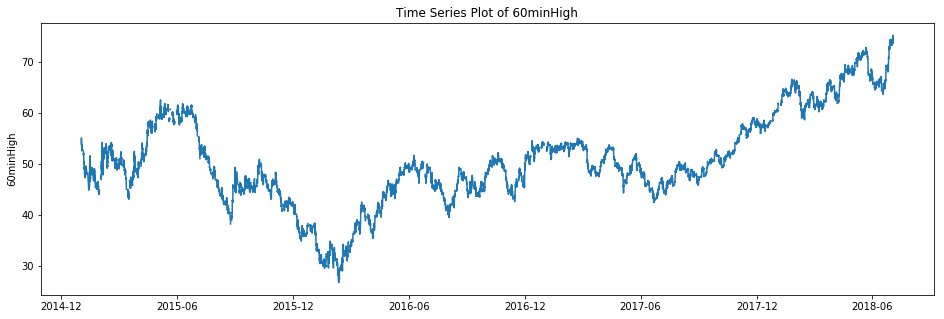

In [47]:
plt_time_series(df,'60minHigh')

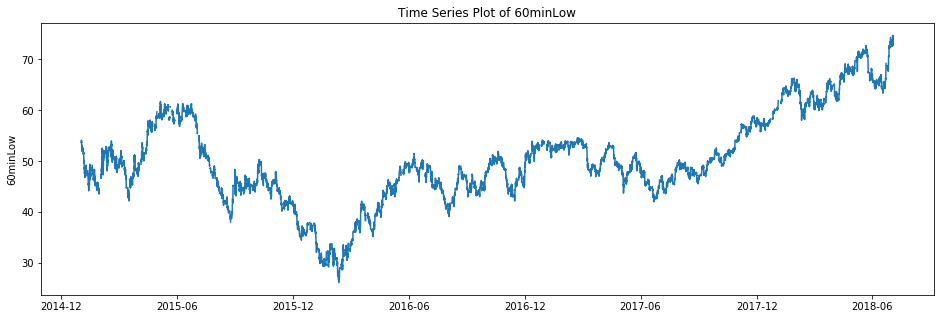

In [48]:
plt_time_series(df,'60minLow')

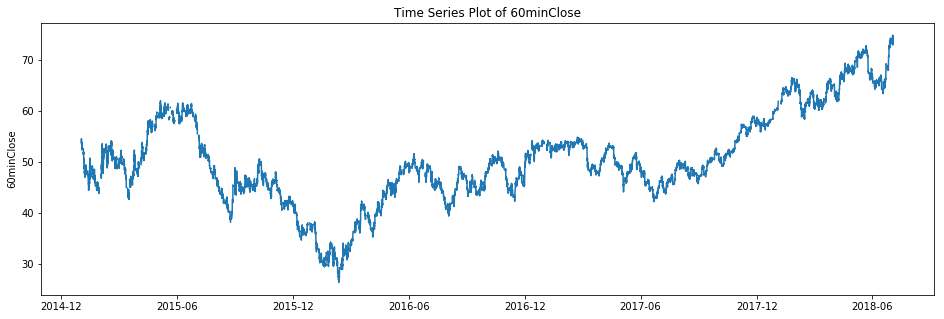

In [49]:
plt_time_series(df,'60minClose')

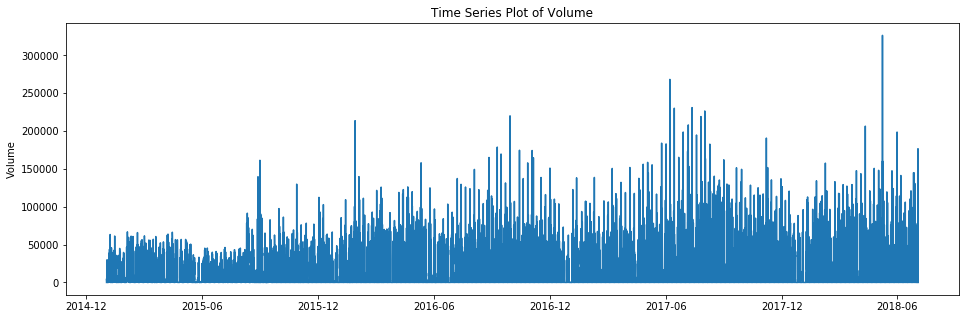

In [50]:
plt_time_series(df,'Volume')